In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
%matplotlib inline
import os
import pandas as pd
import numpy as np
import sys
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import gridspec
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import scipy.stats
from mpl_toolkits.axes_grid1 import make_axes_locatable

#for exporting to Adobe Illustrator
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [4]:
plt.style.use('ggplot')
plt.rcParams['lines.linewidth']=0
plt.rcParams['axes.facecolor']='1.0'
plt.rcParams['xtick.color']='black'
plt.rcParams['axes.grid']=False
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['grid.color']= '1.0'
plt.rcParams.update({'font.size': 10})
plt.rc('font', family='serif')

####################################################################################################################################################################################

# [1] Load in Homoplasy Scores from *SNPPar* for SNPs

####################################################################################################################################################################################

In [5]:
#load in SNPs
all_homoplasic_SNPs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/SNP homoplasies from SNPPar/homoplasy_count_across_lineages.pkl')

In [6]:
all_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844


In [7]:
np.shape(all_homoplasic_SNPs)

(834981, 20)

Note - SNPs & INDELs with homoplasy score $ = 0$ were dropped from DataFrames

#### mark *mmpR* (Rv0678)  & *glpK* (Rv3696c) as an Antibiotic Resistance gene

In [8]:
all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv0678', 'gene_category'] = 'Antibiotic Resistance'
all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv0678', 'gene_name'] = 'mmpR'

all_homoplasic_SNPs.loc[all_homoplasic_SNPs['gene_id'] == 'Rv3696c', 'gene_category'] = 'Antibiotic Resistance'

In [ ]:
ettA_SNVs = all_homoplasic_SNPs[all_homoplasic_SNPs.gene_id == 'Rv2477c']
ettA_SNVs.sort_values(by ='total', ascending = False, inplace = True)

In [116]:
ettA_SNVs.shape

(311, 20)

In [115]:
ettA_SNVs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
6610,2782766.0,A,G,G,Rv2477c,1277,Essential,N,V426A,0,4,0,0,0,0,0,0,4,Rv2477c,14
13439,2784034.0,C,T,T,Rv2477c,9,Essential,S,E3E,1,2,0,0,0,0,0,0,3,Rv2477c,4
13587,2783242.0,G,A,A,Rv2477c,801,Essential,S,T267T,1,0,0,2,0,0,0,0,3,Rv2477c,3
13593,2783335.0,G,A,A,Rv2477c,708,Essential,S,P236P,1,1,0,0,1,0,0,0,3,Rv2477c,5
13428,2783962.0,A,G,G,Rv2477c,81,Essential,S,S27S,0,0,0,0,3,0,0,0,3,Rv2477c,4


In [110]:
ettA_SNVs[ettA_SNVs.AA_change=='G41E']

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
37782,2783921.0,C,T,T,Rv2477c,122,Essential,N,G41E,0,0,0,0,2,0,0,0,2,Rv2477c,289


####################################################################################################################################################################################

# [2] Load in Homoplasy Scores from *TopDis (spacer length = 4)* for INDELs

####################################################################################################################################################################################

In [9]:
#load in INDELs
all_homoplasic_INDELs = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/INDEL homoplasies/homoplasy_count_across_lineages_spacer_4.pkl')

In [10]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,1,2,3,4A,4B,4C,5,6,total,num_isolates
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,41.0,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,23.0,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,21.0,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,1.0,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,5.0,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52


In [11]:
np.shape(all_homoplasic_INDELs)

(46306, 22)

INDELs that caused frameshifts within open reading frames

In [12]:
INDEL_FS_filter = np.array([('_' not in gene_id) and (indel_type == 'frameshift') and (gene_cat != 'None') for gene_id, indel_type, gene_cat in zip(all_homoplasic_INDELs.gene_id, all_homoplasic_INDELs.INDEL_type, all_homoplasic_INDELs.gene_category)])
FS_ORF_homoplasic_INDELs = all_homoplasic_INDELs[INDEL_FS_filter]

In [13]:
FS_ORF_homoplasic_INDELs.shape

(32883, 22)

In [14]:
np.median(FS_ORF_homoplasic_INDELs.num_isolates.astype(float) / 31428.0) * 100.0

0.003181876034109711

Note - SNPs & INDELs with homoplasy score $ = 0$ were dropped from DataFrames

#### mark *mmpR* (Rv0678) as an Antibiotic Resistance gene

In [15]:
all_homoplasic_INDELs.loc[all_homoplasic_INDELs['gene_id'] == 'Rv0678', 'gene_category'] = 'Antibiotic Resistance'
all_homoplasic_INDELs.loc[all_homoplasic_INDELs['gene_id'] == 'Rv0678', 'gene_name'] = 'mmpR'

all_homoplasic_INDELs.loc[all_homoplasic_INDELs['gene_id'] == 'Rv3696c', 'gene_category'] = 'Antibiotic Resistance'

## [2.1] Separate INDELs into those occcurring in HT regions, SSR regions and those not in either

### HT

In [16]:
homopolymeric_regions_from_Luca = pd.read_csv('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/comparison_with_homopolymeric_regions/homopolymer regions from Luca/list_homopolymers_7bpmore_pure.csv')

create a set of all Reference Positions that occur within a Homopolymeric Tract

In [17]:
all_HT_ref_postions = []
for HT_i_start, HT_i_end in zip(homopolymeric_regions_from_Luca.chromStart, homopolymeric_regions_from_Luca.chromEnd):
    
    HT_i_ref_positions = range(HT_i_start, HT_i_end+1)
    all_HT_ref_postions = all_HT_ref_postions + HT_i_ref_positions
    
all_HT_ref_postions = set(all_HT_ref_postions)

In [18]:
len(all_HT_ref_postions)

1160

### SSR

In [19]:
SSR_H37Rv_df = pd.read_pickle('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/simple_sequence_repeat_regions/SSR_H37Rv_2-6bp_at_least_3_repeats.pkl')

In [20]:
SSR_H37Rv_df.head()

,H37Rv_start,H37Rv_end,motif,repeats
0,561,569,CGC,3
1,562,570,GCC,3
2,643,648,AC,3
3,1121,1126,GC,3
4,1408,1413,CA,3


In [21]:
H37Rv_SSR_positions_list = []
for SSR_i_start, SSR_i_end in zip(SSR_H37Rv_df.H37Rv_start, SSR_H37Rv_df.H37Rv_end):
    
    SSR_i_H37Rv_coords = list(np.arange(SSR_i_start, SSR_i_end + 1))
    
    H37Rv_SSR_positions_list = H37Rv_SSR_positions_list + SSR_i_H37Rv_coords
    
H37Rv_SSR_positions_list = list(set(H37Rv_SSR_positions_list)) # remove duplicate positions from overlapping SSR regions

#### Start at -1bp relative to the SSR track since that's where variants are usually called

In [22]:
SSR_H37Rv_df.loc[:, 'H37Rv_start'] = SSR_H37Rv_df.H37Rv_start - 1

In [23]:
SSR_H37Rv_df.head()

,H37Rv_start,H37Rv_end,motif,repeats
0,560,569,CGC,3
1,561,570,GCC,3
2,642,648,AC,3
3,1120,1126,GC,3
4,1407,1413,CA,3


**Note:** use this list when sorting INDEL variants that occur within an SSR region

In [24]:
H37Rv_SSR_positions_list = []
for SSR_i_start, SSR_i_end in zip(SSR_H37Rv_df.H37Rv_start, SSR_H37Rv_df.H37Rv_end):
    
    SSR_i_H37Rv_coords = list(np.arange(SSR_i_start, SSR_i_end + 1))
    
    H37Rv_SSR_positions_list = H37Rv_SSR_positions_list + SSR_i_H37Rv_coords
    
H37Rv_SSR_positions_list = list(set(H37Rv_SSR_positions_list)) # remove duplicate positions from overlapping SSR regions

In [25]:
len(H37Rv_SSR_positions_list)

112673

set of all Reference Positions that occur within a SSR region (including positions at -1bp relative to SSR region)

In [26]:
H37Rv_SSR_positions = set(H37Rv_SSR_positions_list)

In [27]:
len(H37Rv_SSR_positions)

112673

### Annotate each INDEL based on whether it is in a SSR or HR or other

iterate through all INDELs and figure out which occur in SSR and those that don't

In [28]:
repeat_region_list = []
for indel_i_pos in all_homoplasic_INDELs.pos:
    
    if indel_i_pos in all_HT_ref_postions:
        repeat_region_list.append('HT')
    
    elif indel_i_pos in H37Rv_SSR_positions:
        repeat_region_list.append('SSR')
        
    else:
        repeat_region_list.append('no')
        
all_homoplasic_INDELs.loc[:,'repeat_region'] = repeat_region_list

In [29]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388,no
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212,no
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182,SSR
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48,no
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52,SSR


####################################################################################################################################################################################

# [2A] side-analyses

####################################################################################################################################################################################

### [1] IQR  of homoplasy scores

Median & IQR of **SNVs**

In [27]:
np.median(all_homoplasic_SNPs.total)

1.0

In [28]:
np.mean(all_homoplasic_SNPs.total)

1.1998069417148414

In [29]:
q75, q25 = np.percentile(all_homoplasic_SNPs.total, [75, 25])
iqr = q75 - q25

In [30]:
q25

1.0

In [31]:
q75

1.0

proportion of SNVs that have *Hs* = 1

In [32]:
float(sum(all_homoplasic_SNPs.total == 1)) / float(len(all_homoplasic_SNPs.total))

0.8947652701079426

number of SNVs w/ *Hs* > 100

In [33]:
sum(all_homoplasic_SNPs.total >= 100)

102

Median & IQR of **INDELs**

In [34]:
np.median(all_homoplasic_INDELs.total)

1.0

In [35]:
np.mean(all_homoplasic_INDELs.total)

1.8928648555262817

In [36]:
q75, q25 = np.percentile(all_homoplasic_INDELs.total, [75, 25])
iqr = q75 - q25

In [37]:
q25

1.0

In [38]:
q75

1.0

proportion of INDELs that have *Hs* = 1

In [39]:
float(sum(all_homoplasic_INDELs.total == 1)) / float(len(all_homoplasic_INDELs.total))

0.8856951582948214

number of INDELs w/ *Hs* > 100

In [40]:
sum(all_homoplasic_INDELs.total >= 100)

59

### [2] SNV-INDEL acquisition rate / kbp

##### Find numerator by including combination of following depending on region being probed
1. low EBR sites = 169630
1. sites w/ 10% of isolates missing call = 31215
1. sites in overlapping genes = 933
1. sites in MGE regions = 79659
1. sites within SSR regions = 112673
1. sites within HT regions = 1160

numbers taken from *mutational (SNV & INDEL) density calculations for genes.pynb*, *H_1_Scraping_Lucas_DB_for_Genotypes_Matrix_2 3.pynb* & *CLEAN - INDEL Homoplasy Analysis 2 (SSR INDELs).pynb*

##### SNV rate per kbp across whole genome

In [41]:
all_homoplasic_variants = all_homoplasic_SNPs

# numerator - total variants in this region
total_variant_arisals = float(all_homoplasic_SNPs.total.sum())

# denominator - length of H37Rv minus regions dropped (all low EBR sites + 10% isolates missing + sites in overlapping genes)
genome_len = 4411532.0 - 169630.0 - 31215.0 - 933.0 - 79659.0

(total_variant_arisals / genome_len)*1000.0

242.5648804688512

In [42]:
all_homoplasic_variants.shape

(834981, 20)

##### INDEL rate per kbp across HT

In [43]:
all_homoplasic_variants = all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'HT']

# numerator - total variants in this region
total_variant_arisals = float(all_homoplasic_variants.total.sum())

# denominator - summed length of HT regions
genome_len = 1160.0

(total_variant_arisals / genome_len)*1000.0

9339.655172413793

In [44]:
all_homoplasic_variants.shape

(330, 23)

##### INDEL rate per kbp across SSR

In [45]:
all_homoplasic_variants = all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'SSR']

# numerator - total variants in this region
total_variant_arisals = float(all_homoplasic_variants.total.sum())

# denominator - summed length of SSR regions
genome_len = 112673.0

(total_variant_arisals / genome_len)*1000.0

61.77167555669948

In [46]:
all_homoplasic_variants.shape

(2077, 23)

##### INDEL rate per kbp across non-HT-SSR

In [47]:
all_homoplasic_variants = all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'no']

# numerator - total variants in this region
total_variant_arisals = float(all_homoplasic_variants.total.sum())

# denominator - length of H37Rv minus regions dropped (all low EBR sites + 10% isolates missing + sites in overlapping genes) - HR regions - SSR regions
genome_len = 4411532.0 - 169630.0 - 31215.0 - 933.0 - 79659.0

(total_variant_arisals / genome_len)*1000.0

16.914138778890074

In [48]:
all_homoplasic_variants.shape

(43899, 23)

In [49]:
all_homoplasic_variants.sort_values(by='total', ascending=False).head(n=3)

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
33901,3131469,T,TTGTCGGCGA,Antigen,Rv2823c,Rv2823c,305,ins,inframe,102,...,377.0,183.0,351.0,367.0,88.0,5.0,5.0,1534.0,5093,no
20085,1894300,G,GGTCTTGCCGC,Non-Essential,Rv1668c,Rv1668c,1043,ins,frameshift,348,...,306.0,205.0,288.0,313.0,210.0,11.0,5.0,1488.0,12599,no
10886,968426,A,AGCCGGGTTG,PE/PPE,PE_PGRS15,Rv0872c,1819,ins,inframe,607,...,345.0,118.0,275.0,302.0,147.0,3.0,3.0,1331.0,2943,no


#### Test for differences of means assuming mutations are poisson distributed

In [39]:
# rates per kbp
HT_acq_rate = 9339.66
SSR_acq_rate = 61.77
non_HT_SSR_rate = 16.91

N = 31428 # number of isolates? do we have to consider length of genome?

HT vs. SSR

In [40]:
z = (HT_acq_rate - SSR_acq_rate) / np.sqrt( ((HT_acq_rate/N) + (SSR_acq_rate/N)) )
p_value = scipy.stats.norm.sf(abs(z))*2 # twosided

In [41]:
z

16963.31133694795

HT vs. non-HT-SSR

In [42]:
z = (HT_acq_rate - non_HT_SSR_rate) / np.sqrt( ((HT_acq_rate/N) + (non_HT_SSR_rate/N)) )
p_value = scipy.stats.norm.sf(abs(z))*2 # twosided

In [43]:
z

17086.144502222345

In [44]:
p_value

0.0

SSR vs. non-HT-SSR

In [45]:
z = (SSR_acq_rate - non_HT_SSR_rate) / np.sqrt( ((SSR_acq_rate/N) + (non_HT_SSR_rate/N)) )
p_value = scipy.stats.norm.sf(abs(z))*2 # twosided

In [46]:
z

896.5726072784139

In [47]:
p_value

0.0

To compare p-values above, check p-value corresponding to a smaller z-score.

In [37]:
z

24.514865033480305

In [38]:
p_value

1.025520574294258e-132

**Fisher Exact test** split by **intergenic** & *Hs* >=5 and *Hs* < 5

In [60]:
all_homoplasic_variants[(all_homoplasic_variants.total < 5) & (all_homoplasic_variants.stop_codon == 'intergenic')].shape

(6941, 23)

In [61]:
all_homoplasic_variants[all_homoplasic_variants.total < 5].shape

(42906, 23)

In [62]:
all_homoplasic_variants[(all_homoplasic_variants.total >= 5) & (all_homoplasic_variants.stop_codon == 'intergenic')].shape

(257, 23)

In [63]:
all_homoplasic_variants[all_homoplasic_variants.total >= 5].shape

(993, 23)

- 257 / 993 **Hs $\ge$ 5** intergenic
- 6941 / 42906 **Hs $<$ 5** intergenic

In [14]:
import scipy.stats as stats

data = [[257, 6941],
         [736, 35965]]

FE_results = stats.fisher_exact(data)

In [15]:
FE_results[0]

1.8093114402134762

In [16]:
FE_results[1]

1.5134141645524636e-14

### **Fisher Exact tests** for WT/FS between Susc. and Res. isolates for different HT/antibiotic combinations

In [93]:
import scipy.stats as stats

S_FS = 79
S_WT = 9765
R_FS = 72
R_WT = 4621

data = [[S_WT, S_FS],
         [R_WT, R_FS]]

OR, p_val = stats.fisher_exact(data)

upper_95_CI = np.exp(np.log(OR) + 1.96*np.sqrt((1.0/S_FS) + (1.0/S_WT) + (1.0/R_FS) + (1.0/R_WT)))
lower_95_CI = np.exp(np.log(OR) - 1.96*np.sqrt((1.0/S_FS) + (1.0/S_WT) + (1.0/R_FS) + (1.0/R_WT)))

print(str(round(OR, 2)) + ' (' + str(round(lower_95_CI, 2)) + '-' + str(round(upper_95_CI, 2)) + ')')

1.93 (1.4-2.66)


### [3] Median Allele Frequencies

In [67]:
np.median(all_homoplasic_INDELs[(all_homoplasic_INDELs.INDEL_type == 'frameshift')].num_isolates / 31428.0) * 100.0

0.003181876034109711

In [68]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388,no
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212,no
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182,SSR
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48,no
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52,SSR


### [4] Calculate frequency of mutation arisals that affect *transcription* vs *translation*

#### Transcription

- INDEL within a ncRNA with a regulator role (ncRNA review)

- INDEL in intergenic region within 50bp of a predicted TSS (see Schell paper)

##### reg ncRNAs

Load table of regulatory ncRNAs

In [69]:
reg_ncRNAs_df = pd.read_csv('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/regulatory ncRNAs.csv')

In [70]:
reg_ncRNAs_df.head()

,name,strand,start,end,log2fold change low iron,log2fold fold change tBHP,log2fold fold change SDS,log2fold fold change acid,log2fold fold change PBS
0,ncRv10006,+,9824,9877,1.58,0.34,-0.36,-0.31,-1.42
1,ncRv0046c,-,49956,50033,0.25,1.72,0.36,1.63,4.23
2,ncRv0047c,-,51723,51779,-0.86,1.40,1.64,3.09,3.87
3,ncRv0053,+,58117,58193,-0.85,-1.17,-0.25,-1.48,0.46
4,ncRv10071,+,80239,80441,-0.61,-0.99,-0.77,1.65,-1.52


In [71]:
reg_ncRNAs_df.shape

(189, 9)

Create set of all coordinates that belong to a regulatory ncRNA

In [72]:
reg_ncRNA_coords = []

for ncRNA_i in reg_ncRNAs_df.index:
    
    ncRNA_i_start_coord = reg_ncRNAs_df.loc[ncRNA_i, 'start']
    ncRNA_i_end_coord = reg_ncRNAs_df.loc[ncRNA_i, 'end']
    
    reg_ncRNA_coords = reg_ncRNA_coords + list(np.arange(ncRNA_i_start_coord, ncRNA_i_end_coord+1))
        
TSS_50bp_upstream_coords = set(reg_ncRNA_coords)

In [73]:
len(reg_ncRNA_coords)

22018

##### TSS

Load table of TSSs

In [49]:
TSS_df = pd.read_csv('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/transcriptional start sites.csv')

In [50]:
TSS_df.head()

,TSS unique identifier,Strand,Coordinate (genome version NC_000962),Mean coverage in converted libraries,Downstream same-strand gene,position relative to downstream same-strand gene,Overlapping same-strand gene,Position in overlapping same-strand gene,Position in overlapping same-strand gene relative to length,nt at +1
0,1776702+,+,1776702,43.0,Rv1570,NaN,Rv1569,1.0,0.0,A
1,469591+,+,469591,106.5,Rv0391,NaN,Rv0390,1.0,0.0,G
2,2485273+,+,2485273,464.5,Rv2219,NaN,Rv2218,1.0,0.0,A
3,645467+,+,645467,182.0,Rv0555,NaN,Rv0554,1.0,0.0,G
4,1160434-,-,1160434,87.5,Rv1036c,-1.0,none,NaN,NaN,G


In [51]:
TSS_df.shape

(4978, 10)

Create set of all coordinates that are 50bp upstream a TSS

In [52]:
TSS_50bp_upstream_coords = []

for TSS_i in TSS_df.index:
    
    TSS_coord = TSS_df.loc[TSS_i, 'Coordinate (genome version NC_000962)']
    TSS_strand = TSS_df.loc[TSS_i, 'Strand']
    
    if TSS_strand == '+':
        TSS_upstream_coords = np.arange(TSS_coord-50, TSS_coord)
        TSS_50bp_upstream_coords = TSS_50bp_upstream_coords + list(TSS_upstream_coords)
        
    if TSS_strand == '-':
        TSS_upstream_coords = np.arange(TSS_coord, TSS_coord+50)
        TSS_50bp_upstream_coords = TSS_50bp_upstream_coords + list(TSS_upstream_coords)
        
TSS_50bp_upstream_coords = set(TSS_50bp_upstream_coords)

In [53]:
len(TSS_50bp_upstream_coords)

228410

#### SSR INDELs &  frameshifts

In [80]:
SSR_INDELs_df = all_homoplasic_INDELs[(all_homoplasic_INDELs.repeat_region == 'SSR')] # all SSR INDELs
SSR_INDELs_df.reset_index(inplace = True, drop  = True)

In [81]:
SSR_INDELs_df.shape

(2077, 23)

In [69]:
SSR_FS_INDELs_df = all_homoplasic_INDELs[(all_homoplasic_INDELs.INDEL_type == 'frameshift') & (all_homoplasic_INDELs.repeat_region == 'SSR')]
SSR_FS_INDELs_df.reset_index(inplace = True, drop  = True)

In [70]:
SSR_FS_INDELs_df.shape

(1190, 23)

#### [1] SSR INDELs that affect Transcription

In [82]:
SSR_INDEL_reg_ncRNA = 0
SSR_INDEL_upstream_TSS = 0

for indel_i in SSR_INDELs_df.index:
        
    if SSR_INDELs_df.loc[indel_i, 'pos'] in reg_ncRNA_coords:
        SSR_INDEL_reg_ncRNA += 1
        
    if SSR_INDELs_df.loc[indel_i, 'pos'] in TSS_50bp_upstream_coords:
        SSR_INDEL_upstream_TSS += 1

In [83]:
SSR_INDEL_reg_ncRNA + SSR_INDEL_upstream_TSS

128

#### [2] SSR INDELs that affect Translation
- FS in coding reading frame anywhere

In [73]:
SSR_FS_INDELs_df[(SSR_FS_INDELs_df.stop_codon != 'RNA') & (SSR_FS_INDELs_df.stop_codon != 'intergenic')].shape

(981, 23)

In [74]:
SSR_FS_INDELs_df[(SSR_FS_INDELs_df.stop_codon == 'premature stop - first 3/4')].shape

(570, 23)

#### HT INDELs & frameshifts

In [84]:
HT_INDELs_df = all_homoplasic_INDELs[(all_homoplasic_INDELs.repeat_region == 'HT')] # all HT INDELs
HT_INDELs_df.reset_index(inplace = True, drop  = True)

In [85]:
HT_INDELs_df.shape

(330, 23)

In [86]:
HT_FS_INDELs_df = all_homoplasic_INDELs[(all_homoplasic_INDELs.INDEL_type == 'frameshift') & (all_homoplasic_INDELs.repeat_region == 'HT')]
HT_FS_INDELs_df.reset_index(inplace = True, drop  = True)

In [87]:
HT_FS_INDELs_df.shape

(294, 23)

#### [3] HT INDELs that affect Transcription

In [88]:
HT_INDEL_reg_ncRNA = 0
HT_INDEL_upstream_TSS = 0

for indel_i in HT_INDELs_df.index:
        
    if HT_INDELs_df.loc[indel_i, 'pos'] in reg_ncRNA_coords:
        HT_INDEL_reg_ncRNA += 1
        
    if HT_INDELs_df.loc[indel_i, 'pos'] in TSS_50bp_upstream_coords:
        HT_INDEL_upstream_TSS += 1

In [89]:
HT_INDEL_reg_ncRNA + HT_INDEL_upstream_TSS

25

#### [4] HT INDELs that affect Translation
- FS in coding reading frame anywhere

In [80]:
HT_FS_INDELs_df[(HT_FS_INDELs_df.stop_codon != 'RNA') & (HT_FS_INDELs_df.stop_codon != 'intergenic')].shape

(230, 23)

In [81]:
HT_FS_INDELs_df[(HT_FS_INDELs_df.stop_codon == 'premature stop - first 3/4')].shape

(117, 23)

#### How many HTs with Hs > 45 are *intergenic* and within 50bp of a TSS?

In [82]:
homopolymeric_regions_from_Luca = pd.read_excel('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/for publication/TopDis_INDEL_homoplasy_count_aggregated_by_homopolymer_region.xlsx')

In [83]:
homopolymeric_regions_from_Luca.head()

,Chromosome,chromStart,chromEnd,polyNT,locus_tag,gene_name,INDEL_homoplasy,num_isolates_with_INDEL
0,NC_000962.3,976897,976906,GGGGGGGGG,Rv0878c,PPE13,2317,8351
1,NC_000962.3,854252,854261,CCCCCCCCC,inter_Rv0759c_Rv0760c,inter_Rv0759c_Rv0760c,776,28077
2,NC_000962.3,976889,976896,TTTTTTTT,Rv0878c,PPE13,771,5641
3,NC_000962.3,1992323,1992331,CCCCCCCC,Rv1759c,wag22,578,4052
4,NC_000962.3,2338194,2338202,CCCCCCCC,Rv2081c,Rv2081c,360,4596


intergenic HTs w/ *Hs* > 45

In [84]:
homopolymeric_regions_from_Luca = homopolymeric_regions_from_Luca[['inter' in locus_i for locus_i in homopolymeric_regions_from_Luca.locus_tag]]
homopolymeric_regions_from_Luca = homopolymeric_regions_from_Luca[homopolymeric_regions_from_Luca.INDEL_homoplasy > 45]
homopolymeric_regions_from_Luca.reset_index(inplace = True, drop = True)

In [85]:
homopolymeric_regions_from_Luca

,Chromosome,chromStart,chromEnd,polyNT,locus_tag,gene_name,INDEL_homoplasy,num_isolates_with_INDEL
0,NC_000962.3,854252,854261,CCCCCCCCC,inter_Rv0759c_Rv0760c,inter_Rv0759c_Rv0760c,776,28077
1,NC_000962.3,4323354,4323361,GGGGGGG,inter_Rv3848_Rv3849,inter_Rv3848_espR,269,1355
2,NC_000962.3,2234247,2234254,GGGGGGG,inter_Rv1990c_Rv1991c,inter_Rv1990c_mazF6,217,901
3,NC_000962.3,364498,364505,GGGGGGG,inter_Rv0301_Rv0302,inter_vapC2_Rv0302,216,676
4,NC_000962.3,3742991,3742998,GGGGGGG,inter_Rv3345c_Rv3346c,inter_PE_PGRS50_Rv3346c,214,2229
5,NC_000962.3,2976558,2976565,CCCCCCC,inter_Rv2652c_Rv2653c,inter_Rv2652c_Rv2653c,152,669
6,NC_000962.3,4056480,4056487,TTTTTTT,inter_Rv3616c_Rv3617,inter_espA_ephA,108,405
7,NC_000962.3,1026916,1026923,GGGGGGG,inter_Rv0920c_Rv0921,inter_Rv0920c_Rv0921,90,332
8,NC_000962.3,2881582,2881589,TTTTTTT,inter_Rv2560_Rv2563,inter_Rv2560_Rv2563,89,3701
9,NC_000962.3,2440187,2440194,GGGGGGG,inter_Rv2177c_Rv2178c,inter_Rv2177c_aroG,69,819


In [86]:
len(TSS_50bp_upstream_coords)

228410

In [87]:
located_near_TSS = []

for HT_i_start, HT_i_end in zip(homopolymeric_regions_from_Luca.chromStart, homopolymeric_regions_from_Luca.chromEnd):
    
    near_TSS = 'no'
    
    HT_positions = np.arange(np.min([HT_i_start, HT_i_end]) + 1, np.max([HT_i_start, HT_i_end])+1)
    
    for HT_i_pos in HT_positions:
        
        if HT_i_pos in TSS_50bp_upstream_coords:
            near_TSS = 'yes'
            break
            
    located_near_TSS.append(near_TSS)
    
homopolymeric_regions_from_Luca.loc[:,'near_TSS'] = located_near_TSS

In [88]:
homopolymeric_regions_from_Luca

,Chromosome,chromStart,chromEnd,polyNT,locus_tag,gene_name,INDEL_homoplasy,num_isolates_with_INDEL,near_TSS
0,NC_000962.3,854252,854261,CCCCCCCCC,inter_Rv0759c_Rv0760c,inter_Rv0759c_Rv0760c,776,28077,no
1,NC_000962.3,4323354,4323361,GGGGGGG,inter_Rv3848_Rv3849,inter_Rv3848_espR,269,1355,yes
2,NC_000962.3,2234247,2234254,GGGGGGG,inter_Rv1990c_Rv1991c,inter_Rv1990c_mazF6,217,901,no
3,NC_000962.3,364498,364505,GGGGGGG,inter_Rv0301_Rv0302,inter_vapC2_Rv0302,216,676,yes
4,NC_000962.3,3742991,3742998,GGGGGGG,inter_Rv3345c_Rv3346c,inter_PE_PGRS50_Rv3346c,214,2229,no
5,NC_000962.3,2976558,2976565,CCCCCCC,inter_Rv2652c_Rv2653c,inter_Rv2652c_Rv2653c,152,669,no
6,NC_000962.3,4056480,4056487,TTTTTTT,inter_Rv3616c_Rv3617,inter_espA_ephA,108,405,yes
7,NC_000962.3,1026916,1026923,GGGGGGG,inter_Rv0920c_Rv0921,inter_Rv0920c_Rv0921,90,332,no
8,NC_000962.3,2881582,2881589,TTTTTTT,inter_Rv2560_Rv2563,inter_Rv2560_Rv2563,89,3701,no
9,NC_000962.3,2440187,2440194,GGGGGGG,inter_Rv2177c_Rv2178c,inter_Rv2177c_aroG,69,819,no


In [90]:
fs_genotype_matrix = pd.read_csv('/n/data1/hms/dbmi/farhat/lfreschi/mic_assemblies/56-phase_variation/results/gwas/assoc_frameshifts_all_antibiotics/genotype_matrix.csv', header = None)

In [91]:
fs_genotype_matrix.shape

(145, 31428)

In [92]:
from collections import Counter
Counter(list(fs_genotype_matrix.loc[0,:]))

Counter({0.0: 26525, 1.0: 4903})

In [93]:
res_data_df = pd.read_csv('https://raw.githubusercontent.com/farhat-lab/resdata-ng/master/resistance_data/summary_tables/resistance_summary.txt', sep='\t')

In [94]:
res_data_df.head()

,Isolate,AMIKACIN,AMOXICILLIN,CAPREOMYCIN,CIPROFLOXACIN,CLARITHROMYCIN,CLOFAZIMINE,CYCLOSERINE,ETHAMBUTOL,ETHIOMIDE,...,MOXIFLOXACIN,OFLOXACIN,OXIFLOXACIN,PARA-AMINOSALICYLIC_ACID,PARA_AMINOSALICYLIC_ACID,PROTHIONAMIDE,PYRAZINAMIDE,RIFABUTIN,RIFAMPICIN,STREPTOMYCIN
0,00R0223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S
1,00R0312,NaN,NaN,R,NaN,NaN,NaN,NaN,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R,R
2,00R0435,S,NaN,NaN,NaN,S,NaN,NaN,R,NaN,...,NaN,S,NaN,NaN,NaN,NaN,R,NaN,R,R
3,00R0453,NaN,NaN,R,NaN,NaN,NaN,NaN,R,NaN,...,NaN,R,NaN,NaN,NaN,NaN,NaN,NaN,R,R
4,00R1566,NaN,NaN,R,NaN,NaN,NaN,NaN,R,NaN,...,NaN,S,NaN,NaN,NaN,NaN,R,NaN,R,R


In [95]:
Counter(res_data_df['ISONIAZID'].tolist())

Counter({nan: 967, 'R': 6749, 'S': 14401})

### [6] investigate *PPE13* HT INDELs further

- chromStart = 976872
- chromEnd = 978203
- located on - strand
- gene length = 1,332 bp

In [113]:
homopolymeric_regions_from_Luca[homopolymeric_regions_from_Luca.gene_name == 'PPE13']

,Chromosome,chromStart,chromEnd,polyNT,locus_tag,gene_name,INDEL_homoplasy,num_isolates_with_INDEL
0,NC_000962.3,976897,976906,GGGGGGGGG,Rv0878c,PPE13,2317,8351
2,NC_000962.3,976889,976896,TTTTTTTT,Rv0878c,PPE13,771,5641


In [115]:
976890 - 976872

18

In [119]:
all_homoplasic_INDELs[(all_homoplasic_INDELs.gene_name == 'PPE13') & (all_homoplasic_INDELs.repeat_region == 'HT') & (all_homoplasic_INDELs.stop_codon == 'premature stop - last 1/4')].total.sum()

1529.0

In [120]:
all_homoplasic_INDELs[(all_homoplasic_INDELs.gene_name == 'PPE13') & (all_homoplasic_INDELs.repeat_region == 'HT') & (all_homoplasic_INDELs.stop_codon == 'elongation - appears after annotated stop')].total.sum()

1559.0

### [6] What proportion of INDEL mutation events occur within HTs?

In [61]:
all_homoplasic_INDELs[(all_homoplasic_INDELs.repeat_region == 'HT')].total.sum()

10834.0

In [60]:
all_homoplasic_INDELs.total.sum()

87651.0

In [63]:
float(all_homoplasic_INDELs[(all_homoplasic_INDELs.repeat_region == 'HT')].total.sum() / all_homoplasic_INDELs.total.sum()) * 100

12.36038379482265

### [7] Median length of INDEL variants in SSR regions

In [34]:
SSR_INDELs_df = all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'SSR']
SSR_INDELs_df.shape

(2077, 23)

In [38]:
variant_length_list = []
for ref_allele, alt_allele in zip(SSR_INDELs_df.ref, SSR_INDELs_df.alt):
    variant_length = abs(len(ref_allele) - len(alt_allele))
    variant_length_list.append(variant_length)
variant_length_list = np.array(variant_length_list)

In [40]:
np.min(variant_length_list)

1

In [39]:
np.median(variant_length_list)

2.0

In [41]:
np.max(variant_length_list)

10

####################################################################################################################################################################################

# [2B] Get *SNPs* & *INDELs* for specific genomic regions for other projects

####################################################################################################################################################################################

In [30]:
recomb_RvIDsOfInterest = ["Rv2737c", "Rv0054", "Rv2593c", "Rv2592c", "Rv2594c", "Rv2973c"]

### SNPs

In [26]:
all_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844


In [29]:
all_homoplasic_SNPs.shape

(834981, 20)

In [39]:
homoplasic_SNPs_subset_bool_filter = []
for SNP_i_gene_id in all_homoplasic_SNPs.gene_id:
    if SNP_i_gene_id in recomb_RvIDsOfInterest:
        homoplasic_SNPs_subset_bool_filter.append(True)
    else:
        homoplasic_SNPs_subset_bool_filter.append(False)
        
homoplasic_SNPs_sub = all_homoplasic_SNPs[homoplasic_SNPs_subset_bool_filter]
homoplasic_SNPs_sub.sort_values(by = "pos", ascending = True, inplace = True)
homoplasic_SNPs_sub.reset_index(inplace = True, drop = True)

/home/rv76/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [40]:
homoplasic_SNPs_sub.shape

(1052, 20)

In [46]:
homoplasic_SNPs_sub.sort_values(by='total',ascending = False).head(n = 10)

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
91,59024.0,G,C,C,Rv0054,439,Non-Essential,N,G147R,0,6,0,0,0,0,0,0,6,ssb,10
976,3329486.0,G,A,A,Rv2973c,461,Non-Essential,N,A154V,0,3,1,0,0,1,0,0,5,recG,8
720,3051321.0,C,T,T,Rv2737c,104,Non-Essential,N,R35H,1,0,1,0,2,1,0,0,5,recA,9
82,59004.0,C,T,T,Rv0054,419,Non-Essential,N,A140V,1,0,0,1,1,1,0,0,4,ssb,9
900,3328871.0,A,C,C,Rv2973c,1076,Non-Essential,N,V359G,0,4,0,0,0,0,0,0,4,recG,17
331,2924758.0,G,A,A,Rv2593c,63,Non-Essential,S,A21A,1,0,1,0,1,1,0,0,4,ruvA,65
858,3328610.0,G,A,A,Rv2973c,1337,Non-Essential,N,A446V,1,3,0,0,0,0,0,0,4,recG,5
743,3327791.0,G,A,A,Rv2973c,2156,Non-Essential,N,A719V,1,2,0,0,0,0,0,0,3,recG,31
98,2923210.0,A,C,C,Rv2592c,1024,Non-Essential,N,L342V,0,0,1,2,0,0,0,0,3,ruvB,5
103,2923227.0,C,T,T,Rv2592c,1007,Non-Essential,N,G336E,0,3,0,0,0,0,0,0,3,ruvB,11


output as Excel file

In [54]:
homoplasic_SNPs_sub.to_excel('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/SNP homoplasies from SNPPar/recomb_genes_for_max/homoplasic_SNPs.xlsx')

### INDELs

In [47]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388,no
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212,no
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182,SSR
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48,no
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52,SSR


In [48]:
all_homoplasic_INDELs.shape

(46306, 23)

In [49]:
homoplasic_INDELs_subset_bool_filter = []
for INDEL_i_gene_id in all_homoplasic_INDELs.gene_id:
    if INDEL_i_gene_id in recomb_RvIDsOfInterest:
        homoplasic_INDELs_subset_bool_filter.append(True)
    else:
        homoplasic_INDELs_subset_bool_filter.append(False)
        
homoplasic_INDELs_sub = all_homoplasic_INDELs[homoplasic_INDELs_subset_bool_filter]
homoplasic_INDELs_sub.sort_values(by = "pos", ascending = True, inplace = True)
homoplasic_INDELs_sub.reset_index(inplace = True, drop = True)

/home/rv76/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [50]:
homoplasic_INDELs_sub.shape

(6, 23)

In [51]:
homoplasic_INDELs_sub.sort_values(by='total',ascending = False).head(n = 10)

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
0,58596,A,ACAC,Non-Essential,ssb,Rv0054,11,ins,inframe,4,...,0.0,2.0,0.0,1.0,0.0,0.0,0.0,3.0,6,no
1,59049,TCGG,T,Non-Essential,ssb,Rv0054,464,del,inframe,155,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,SSR
2,59080,AC,A,Non-Essential,ssb,Rv0054,495,del,frameshift,165,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,no
3,3050294,ACCATCCCTG,A,Non-Essential,recA,Rv2737c,1131,del,inframe,377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,no
4,3050347,GAATCGGCGC,G,Non-Essential,recA,Rv2737c,1078,del,inframe,360,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1,no
5,3329097,ACCG,A,Non-Essential,recG,Rv2973c,850,del,inframe,284,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,no


output as Excel file

In [53]:
homoplasic_INDELs_sub.to_excel('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/homoplasies_detected_in_global_lineages/SNP homoplasies from SNPPar/recomb_genes_for_max/homoplasic_INDELs.xlsx')

####################################################################################################################################################################################

# [3] Examine distribution of homoplasy scores for *SNPs*

####################################################################################################################################################################################

In [26]:
all_homoplasic_SNPs.total.max()

1717

#### Count the number unique mutations that occur for each Homoplasy Count - 1, 2, 3, 4 ..

In [27]:
num_unique_mutations_per_homoplasy_score = pd.Series(Counter(all_homoplasic_SNPs.total))

In [28]:
num_unique_mutations_per_homoplasy_score.head(n = 10)

1     747112
2      71074
3       9837
4       2860
5       1181
6        683
7        363
8        297
9        185
10       140
dtype: int64

In [29]:
num_unique_mutations_per_homoplasy_score.tail(n = 5)

743     1
752     1
779     1
1406    1
1717    1
dtype: int64

#### Number of Homoplastic SNVs (homoplasy score $\ge 2$)

In [30]:
num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 2].astype(float).sum()

87869.0

In [31]:
(num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 2].astype(float).sum() / num_unique_mutations_per_homoplasy_score.astype(float).sum()) * 100.0

10.523472989205743

#### Number of Homoplastic SNVs (homoplasy score $\ge 5$)

In [32]:
num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 5].astype(float).sum()

4098.0

In [33]:
(num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 5].astype(float).sum() / num_unique_mutations_per_homoplasy_score.astype(float).sum()) * 100.0

0.49078961078156275

#### For each Homoplasy Score - 1, 2, 3, 4 ... compute the cumulative summation for all unique mutations with at most that many homoplasies

In [34]:
(num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index <= 20].cumsum().values / float(np.shape(all_homoplasic_SNPs)[0])) * 100

array([89.47652701, 97.98857699, 99.16668763, 99.50921039, 99.65065073,
       99.732449  , 99.77592304, 99.81149272, 99.83364891, 99.85041576,
       99.86598497, 99.87808106, 99.88682377, 99.89568625, 99.9020337 ,
       99.90874044, 99.91305191, 99.91724363, 99.92239344, 99.9261061 ])

### ~ 89.5% of SNP mutations have a homoplasy score $\le 1$

### ~ 99.51% of SNP mutations have a homoplasy score $< 5$  &  ~ 0.49% of SNP mutations have a homoplasy score $\ge 5$

### ~ 2% of SNP mutations have a homoplasy score $\ge 3$

####################################################################################################################################################################################

# [4] Examine distribution of homoplasy scores for *INDELs*

####################################################################################################################################################################################

In [35]:
all_homoplasic_SNPs.total.astype(float).max()

1717.0

In [36]:
all_homoplasic_INDELs.total.max()

1534.0

#### Plot the distributions for SNVs & INDELs as a stacked Histogram

In [37]:
def fig_SNV_and_INDEL_distribution_A(ax):

    # stack SNVs counts on top of INDEL counts
    n , bins , patches = ax.hist([all_homoplasic_INDELs.total, all_homoplasic_SNPs.total.astype(float)], color = ['xkcd:golden yellow','xkcd:rust'] , stacked = True , bins = 50 , rwidth = 1.0 , edgecolor='white', linewidth=0.6)

    ax.set_title('Distribution of Homoplasy\nScores for 834,981 SNVs & 46,306 INDELs', fontsize = 8, color = 'k', pad = -10)
    ax.set_xlabel('Hs', fontsize = 8, color = 'k', labelpad = 1)
    ax.set_ylabel('Number of Variants (SNVs & INDELs)' , fontsize = 8, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    ax.set_yscale('log')

    ax.tick_params(labelcolor = 'k')
    ax.set_xlim(-20, 1750)
    ax.set_ylim(0.1, np.max(n)+1000)

    ax.tick_params(axis='y', which='major', labelsize=8 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=8 , labelcolor = 'k')
    
    # create legend
    SNV = 'xkcd:rust'
    INDEL = 'xkcd:golden yellow'

    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [SNV,INDEL]]
    labels = ["SNV (N={0})".format(str(len(all_homoplasic_SNPs.total))),"INDEL (N={0})".format(str(len(all_homoplasic_INDELs.total)))]
    ax.legend(handles, labels, loc='upper right', fontsize=8)

#### Count the number unique mutations that occur for each Homoplasy Count - 1, 2, 3, 4 ..

In [38]:
num_unique_mutations_per_homoplasy_score = pd.Series(Counter(all_homoplasic_INDELs.total))

In [39]:
num_unique_mutations_per_homoplasy_score.head(n = 10)

1.0     41013
2.0      2633
3.0       812
4.0       455
5.0       293
6.0       176
7.0       149
8.0        97
9.0        83
10.0       70
dtype: int64

In [40]:
num_unique_mutations_per_homoplasy_score.tail(n = 5)

1126.0    1
1155.0    1
1331.0    1
1488.0    1
1534.0    1
dtype: int64

#### Number of Homoplastic INDELs (homoplasy score $\ge 2$)

In [41]:
num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 2].astype(float).sum()

5293.0

In [42]:
(num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 2].astype(float).sum() / num_unique_mutations_per_homoplasy_score.astype(float).sum()) * 100.0

11.43048417051786

#### Number of Homoplastic INDELs (homoplasy score $\ge 5$)

In [43]:
num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 5].astype(float).sum()

1393.0

In [44]:
(num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index >= 5].astype(float).sum() / num_unique_mutations_per_homoplasy_score.astype(float).sum()) * 100.0

3.008249470910897

#### For each Homoplasy Score - 1, 2, 3, 4 ... compute the cumulative summation for all unique mutations with at most that many homoplasies

In [45]:
(num_unique_mutations_per_homoplasy_score[num_unique_mutations_per_homoplasy_score.index <= 25].cumsum().values / float(np.shape(all_homoplasic_INDELs)[0])) * 100

array([88.56951583, 94.25560403, 96.00915648, 96.99175053, 97.62449791,
       98.00457824, 98.3263508 , 98.53582689, 98.71506932, 98.86623764,
       98.94614089, 99.02172505, 99.09514966, 99.15777653, 99.19448884,
       99.26791345, 99.30894485, 99.33917851, 99.37157172, 99.39748629,
       99.42771995, 99.45363452, 99.48170863, 99.49898501, 99.5119423 ])

### ~ 88.57% of indel mutations have a homoplasy score $\le 1$

### ~ 96.99% of indel mutations have a homoplasy score $< 5$ 

### ~ 3.01% of indel mutations have a homoplasy score $\ge 5$

################################################################################################################################################

# [5] proportion of INDELs with $Hs \ge X$ for varying values of X

################################################################################################################################################

In [46]:
Hs_thresholds = np.arange(1, 51)
INDELs_HT_prop_list = []
INDELs_SSR_prop_list = []
INDELs_other_prop_list = []

for Hs_i in Hs_thresholds:
    
    INDELs_HT_prop_list.append(float(sum(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'HT'].total >= Hs_i)) / float(np.shape(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'HT'])[0]))
    INDELs_SSR_prop_list.append(float(sum(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'SSR'].total >= Hs_i)) / float(np.shape(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'SSR'])[0]))
    INDELs_other_prop_list.append(float(sum(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'no'].total >= Hs_i)) / float(np.shape(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'no'])[0]))

In [47]:
def fig_prop_INDELs_Hs_for_HT_SSR_other_B(ax):

    ax.plot(Hs_thresholds, INDELs_other_prop_list, color = 'xkcd:black', linewidth = 1.0)
    ax.scatter(Hs_thresholds, INDELs_other_prop_list, color = 'xkcd:black', linewidth = 0.25, s = 10, edgecolor = 'k')

    ax.plot(Hs_thresholds, INDELs_SSR_prop_list, color = 'xkcd:green', linewidth = 1.0)
    ax.scatter(Hs_thresholds, INDELs_SSR_prop_list, color = 'xkcd:green', linewidth = 0.25, s = 10, edgecolor = 'k')

    ax.plot(Hs_thresholds, INDELs_HT_prop_list, color = 'xkcd:blue', linewidth = 1.0)
    ax.scatter(Hs_thresholds, INDELs_HT_prop_list, color = 'xkcd:blue', linewidth = 0.25, s = 10, edgecolor = 'k')

    ax.set_xlabel('Hs', fontsize = 8, color = 'k', labelpad = 1)
    ax.set_ylabel('Proportion of INDELs >= Hs' , fontsize = 8, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)

    ax.tick_params(labelcolor = 'k')
    ax.set_xlim(0, 51)
    ax.set_ylim(-0.01, 1.015)

    ax.tick_params(axis='y', which='major', labelsize=8 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=8 , labelcolor = 'k')

    #create legend
    HT = 'xkcd:blue'
    SSR = 'xkcd:green'
    other = 'xkcd:black'

    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [HT,SSR,other]]
    labels = ["HT (N = {0} INDELs)".format(str(int(np.shape(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'HT'])[0]))),"SSR (N = {0} INDELs)".format(str(int(np.shape(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'SSR'])[0]))),"other (N = {0} INDELs)".format(str(int(np.shape(all_homoplasic_INDELs[all_homoplasic_INDELs.repeat_region == 'no'])[0])))]
    ax.legend(handles, labels, loc='upper right', fontsize=8)

################################################################################################################################################

# [6] Fisher Exact test for SNPs & INDELs

################################################################################################################################################

Fisher Exact test for **Hs $\ge$ 5** for SNPs and INDELs
- 4098 / 834981 SNPs **Hs $\ge$ 5**
- 1393 / 46306 INDELs **Hs $\ge$ 5**

In [48]:
import scipy.stats as stats

data = [[4098, 1393],
         [830001, 44913]]

FE_results = stats.fisher_exact(data)

In [49]:
FE_results[0]

0.1591894517761732

In [50]:
FE_results[1]

0.0

################################################################################################################################################

# [7] Manhattan plots of homoplasies across Reference Genome Position for SNPs & INDELs

################################################################################################################################################

## [7.1] SNPs

### Subset to mutations that have a homoplasy score $\ge 5$ (~0.5% of SNV mutations) AND have an allele frequency $\ge 0.1\%$ in the Mtb sample (N=31,428)

In [51]:
mut_AF_threshold = int(np.ceil(float(31428) * 0.001))
print(mut_AF_threshold)

32


In [52]:
#subset to (SNVs in that have a HP score >= 5) AND (SNVs in which mutant AF >= 0.1%)
subset_homoplasic_SNPs = all_homoplasic_SNPs[(all_homoplasic_SNPs.total >= 5) & (all_homoplasic_SNPs.num_isolates_alt >= mut_AF_threshold)]
subset_homoplasic_SNPs.sort_values(by='total',inplace=True,ascending=False)
subset_homoplasic_SNPs.reset_index(inplace=True,drop=True)

/home/rv76/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [53]:
np.shape(subset_homoplasic_SNPs)

(1525, 20)

In [54]:
subset_homoplasic_SNPs.head()

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102


### [7.1.1] Split subsetted homoplasic SNV variants into different functional types

In [55]:
np.shape(subset_homoplasic_SNPs)

(1525, 20)

#### Different SNP types

In [56]:
set(subset_homoplasic_SNPs.SNP_type)

{'I', 'N', 'R', 'S'}

**Synonymous**

In [57]:
subset_homoplasic_SNPs_Syn = subset_homoplasic_SNPs[subset_homoplasic_SNPs.SNP_type == 'S']
np.shape(subset_homoplasic_SNPs_Syn)

(470, 20)

**Non-Synonymous**

In [58]:
subset_homoplasic_SNPs_NSyn = subset_homoplasic_SNPs[subset_homoplasic_SNPs.SNP_type == 'N']
np.shape(subset_homoplasic_SNPs_NSyn)

(738, 20)

**Intergenic**

In [59]:
subset_homoplasic_SNPs_intergenic = subset_homoplasic_SNPs[subset_homoplasic_SNPs.SNP_type == 'I']
np.shape(subset_homoplasic_SNPs_intergenic)

(308, 20)

**ncRNA**

In [60]:
subset_homoplasic_SNPs_ncRNA = subset_homoplasic_SNPs[subset_homoplasic_SNPs.SNP_type == 'R']
np.shape(subset_homoplasic_SNPs_ncRNA)

(9, 20)

### [7.1.2] Split subsetted homoplasic SNV variants into whether they occurred in *AR* loci or not

**Antibiotic Resistance**

In [61]:
subset_homoplasic_SNPs_AR = subset_homoplasic_SNPs[subset_homoplasic_SNPs.gene_category == 'Antibiotic Resistance']
np.shape(subset_homoplasic_SNPs_AR)

(162, 20)

**not Antibiotic Resistance**

In [62]:
subset_homoplasic_SNPs_non_AR = subset_homoplasic_SNPs[subset_homoplasic_SNPs.gene_category != 'Antibiotic Resistance']
np.shape(subset_homoplasic_SNPs_non_AR)

(1363, 20)

## [7.2] INDELs

In [72]:
all_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
47371,4408100,GC,G,Antibiotic Resistance,gid,Rv3919c,103,del,frameshift,35,...,27.0,51.0,43.0,11.0,29.0,0.0,0.0,202.0,388,no
47365,4408087,CG,C,Antibiotic Resistance,gid,Rv3919c,116,del,frameshift,39,...,11.0,35.0,33.0,10.0,18.0,0.0,0.0,130.0,212,no
47313,4407851,GC,G,Antibiotic Resistance,gid,Rv3919c,352,del,frameshift,118,...,9.0,40.0,20.0,6.0,19.0,0.0,0.0,115.0,182,SSR
25151,2288850,A,ACC,Antibiotic Resistance,pncA,Rv2043c,392,ins,frameshift,131,...,14.0,6.0,3.0,6.0,2.0,0.0,0.0,32.0,48,no
47315,4407851,G,GC,Antibiotic Resistance,gid,Rv3919c,352,ins,frameshift,118,...,1.0,12.0,5.0,7.0,1.0,0.0,0.0,31.0,52,SSR


### Subset to mutations that have a homoplasy score $\ge 5$ (~3.01% of INDEL mutations) AND have an allele frequency $\ge 0.1\%$ in the Mtb sample (N=31,428)

In [73]:
mut_AF_threshold = int(np.ceil(float(31428) * 0.001))
print(mut_AF_threshold)

32


In [74]:
#subset to (INDELs in that have a HP score >= 5) AND (INDELs in which mutant AF >= 0.1%)
subset_homoplasic_INDELs = all_homoplasic_INDELs[(all_homoplasic_INDELs.total >= 5) & (all_homoplasic_INDELs.num_isolates >= mut_AF_threshold)]
subset_homoplasic_INDELs.sort_values(by='total',inplace=True,ascending=False)
subset_homoplasic_INDELs.reset_index(inplace=True,drop=True)

/home/rv76/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [75]:
np.shape(subset_homoplasic_INDELs)

(655, 23)

In [76]:
subset_homoplasic_INDELs.head()

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
0,3131469,T,TTGTCGGCGA,Antigen,Rv2823c,Rv2823c,305,ins,inframe,102,...,377.0,183.0,351.0,367.0,88.0,5.0,5.0,1534.0,5093,no
1,1894300,G,GGTCTTGCCGC,Non-Essential,Rv1668c,Rv1668c,1043,ins,frameshift,348,...,306.0,205.0,288.0,313.0,210.0,11.0,5.0,1488.0,12599,no
2,968426,A,AGCCGGGTTG,PE/PPE,PE_PGRS15,Rv0872c,1819,ins,inframe,607,...,345.0,118.0,275.0,302.0,147.0,3.0,3.0,1331.0,2943,no
3,2137521,A,ACTCCGATCAC,Non-Essential,Rv1888c,Rv1888c,559,ins,frameshift,187,...,278.0,185.0,261.0,287.0,1.0,5.0,4.0,1155.0,12566,no
4,976897,T,TG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,361.0,139.0,249.0,173.0,156.0,0.0,0.0,1126.0,3745,HT


In [77]:
subset_homoplasic_INDELs.head(n=30)

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
0,3131469,T,TTGTCGGCGA,Antigen,Rv2823c,Rv2823c,305,ins,inframe,102,...,377.0,183.0,351.0,367.0,88.0,5.0,5.0,1534.0,5093,no
1,1894300,G,GGTCTTGCCGC,Non-Essential,Rv1668c,Rv1668c,1043,ins,frameshift,348,...,306.0,205.0,288.0,313.0,210.0,11.0,5.0,1488.0,12599,no
2,968426,A,AGCCGGGTTG,PE/PPE,PE_PGRS15,Rv0872c,1819,ins,inframe,607,...,345.0,118.0,275.0,302.0,147.0,3.0,3.0,1331.0,2943,no
3,2137521,A,ACTCCGATCAC,Non-Essential,Rv1888c,Rv1888c,559,ins,frameshift,187,...,278.0,185.0,261.0,287.0,1.0,5.0,4.0,1155.0,12566,no
4,976897,T,TG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,361.0,139.0,249.0,173.0,156.0,0.0,0.0,1126.0,3745,HT
5,1313337,A,AG,None,Rv1179c_pks3,Rv1179c_Rv1180,None,ins,frameshift,None,...,195.0,65.0,129.0,124.0,104.0,0.0,1.0,674.0,16070,no
6,3296371,G,GCCGCGGC,Non-Essential,pks15,Rv2947c,1470,ins,frameshift,490,...,313.0,197.0,0.0,0.0,1.0,9.0,0.0,649.0,6145,no
7,976897,T,TGG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,247.0,50.0,101.0,87.0,52.0,0.0,0.0,556.0,894,HT
8,976897,TG,T,PE/PPE,PPE13,Rv0878c,1307,del,frameshift,436,...,97.0,81.0,94.0,53.0,90.0,0.0,1.0,438.0,3246,HT
9,854252,GCC,G,None,Rv0759c_Rv0760c,Rv0759c_Rv0760c,None,del,frameshift,None,...,90.0,54.0,82.0,67.0,73.0,1.0,6.0,427.0,3139,HT


### [7.2.1] Split subsetted homoplasic INDEL variants into different functional types

In [78]:
np.shape(subset_homoplasic_INDELs)

(655, 23)

#### Different indel types

In [79]:
set(subset_homoplasic_INDELs.INDEL_type)

{'frameshift', 'inframe'}

In [80]:
set(subset_homoplasic_INDELs.stop_codon)

{'RNA',
 'elongation - appears after annotated stop',
 'intergenic',
 'no change',
 'premature stop - first 3/4',
 'premature stop - last 1/4'}

**frameshifts**

In [81]:
subset_homoplasic_INDELs_frameshift = subset_homoplasic_INDELs[(subset_homoplasic_INDELs.INDEL_type == 'frameshift')&(subset_homoplasic_INDELs.stop_codon != 'intergenic')&(subset_homoplasic_INDELs.stop_codon != 'RNA')]
np.shape(subset_homoplasic_INDELs_frameshift)

(352, 23)

**frameshifts** that occurred in HT

In [86]:
subset_homoplasic_INDELs_frameshift[subset_homoplasic_INDELs_frameshift.repeat_region == 'HT'].shape

(94, 23)

**in-frame**

In [73]:
subset_homoplasic_INDELs_inframe = subset_homoplasic_INDELs[(subset_homoplasic_INDELs.INDEL_type == 'inframe')&(subset_homoplasic_INDELs.stop_codon != 'intergenic')&(subset_homoplasic_INDELs.stop_codon != 'RNA')]
np.shape(subset_homoplasic_INDELs_inframe)

(136, 23)

**intergenic**

In [74]:
subset_homoplasic_INDELs_intergenic = subset_homoplasic_INDELs[subset_homoplasic_INDELs.stop_codon == 'intergenic']
np.shape(subset_homoplasic_INDELs_intergenic)

(162, 23)

**ncRNA**

In [75]:
subset_homoplasic_INDELs_ncRNA = subset_homoplasic_INDELs[subset_homoplasic_INDELs.stop_codon == 'RNA']
np.shape(subset_homoplasic_INDELs_ncRNA)

(5, 23)

In [76]:
subset_homoplasic_INDELs_ncRNA

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
54,4099402,A,AG,None,Rv3660c_Rv3661,Rv3660c_Rv3661,None,ins,frameshift,None,...,38.0,10.0,15.0,14.0,16.0,3.0,6.0,113.0,434,HT
128,4099402,AG,A,None,Rv3660c_Rv3661,Rv3660c_Rv3661,None,del,frameshift,None,...,3.0,4.0,3.0,6.0,10.0,0.0,0.0,43.0,209,HT
360,293628,A,AC,None,fadA2_fadE5,Rv0243_Rv0244c,None,ins,frameshift,None,...,4.0,3.0,1.0,0.0,1.0,3.0,1.0,14.0,18911,no
465,1413129,CG,C,None,Rv1264_Rv1265,Rv1264_Rv1265,None,del,frameshift,None,...,5.0,1.0,0.0,1.0,2.0,0.0,0.0,9.0,7588,no
475,293628,A,ACC,None,fadA2_fadE5,Rv0243_Rv0244c,None,ins,frameshift,None,...,4.0,1.0,4.0,0.0,0.0,0.0,0.0,9.0,36,no


### [7.2.2] Split subsetted homoplasic INDEL variants into whether they occurred in *HT*, *SSR* or *non-repeat* region of the genome

**HT**

In [77]:
subset_homoplasic_INDELs_HT = subset_homoplasic_INDELs[(subset_homoplasic_INDELs.repeat_region == 'HT')]
np.shape(subset_homoplasic_INDELs_HT)

(132, 23)

**SSR**

In [78]:
subset_homoplasic_INDELs_SSR = subset_homoplasic_INDELs[(subset_homoplasic_INDELs.repeat_region == 'SSR')]
np.shape(subset_homoplasic_INDELs_SSR)

(92, 23)

**non-repeat**

In [79]:
subset_homoplasic_INDELs_non_repeat = subset_homoplasic_INDELs[(subset_homoplasic_INDELs.repeat_region == 'no')]
np.shape(subset_homoplasic_INDELs_non_repeat)

(431, 23)

### [7.2.3] Split subsetted homoplasic INDEL variants into whether they occurred in *AR* loci or not

**Antibiotic Resistance**

In [80]:
subset_homoplasic_INDELs_AR = subset_homoplasic_INDELs[subset_homoplasic_INDELs.gene_category == 'Antibiotic Resistance']
np.shape(subset_homoplasic_INDELs_AR)

(16, 23)

**not Antibiotic Resistance**

In [81]:
subset_homoplasic_INDELs_non_AR = subset_homoplasic_INDELs[subset_homoplasic_INDELs.gene_category != 'Antibiotic Resistance']
np.shape(subset_homoplasic_INDELs_non_AR)

(639, 23)

### [7.2.4] Brief analysis of INDELs in HT and non-HT regions (AR vs. non-AR mutations)

Fisher Exact test for **AR** variants in top 30 Hs for SNPs and INDELs
- 13 / 30 SNPs **AR**
- 3 / 30 INDELs **AR**

In [101]:
import scipy.stats as stats

data = [[13, 3],
         [17, 27]]

FE_results = stats.fisher_exact(data)

In [102]:
FE_results[0]

6.882352941176471

In [103]:
FE_results[1]

0.0074097830383369565

##### split between HT vs non-HT INDELs

In [82]:
subset_homoplasic_INDELs_HT.shape

(132, 23)

In [84]:
subset_homoplasic_INDELs_non_HT = pd.concat([subset_homoplasic_INDELs_SSR, subset_homoplasic_INDELs_non_repeat])
subset_homoplasic_INDELs_non_HT.shape

(523, 23)

##### how many HT INDELs are AR?

In [87]:
np.shape(subset_homoplasic_INDELs_HT[subset_homoplasic_INDELs_HT.gene_category == 'Antibiotic Resistance'])

(2, 23)

In [88]:
np.shape(subset_homoplasic_INDELs_HT[subset_homoplasic_INDELs_HT.gene_category != 'Antibiotic Resistance'])

(130, 23)

##### how many non-HT INDELs are AR?

In [89]:
np.shape(subset_homoplasic_INDELs_non_HT[subset_homoplasic_INDELs_non_HT.gene_category == 'Antibiotic Resistance'])

(14, 23)

In [90]:
np.shape(subset_homoplasic_INDELs_non_HT[subset_homoplasic_INDELs_non_HT.gene_category != 'Antibiotic Resistance'])

(509, 23)

##### how many SNVs are AR?

In [91]:
subset_homoplasic_SNPs_AR.shape

(162, 20)

In [93]:
subset_homoplasic_SNPs_non_AR.shape

(1363, 20)

Fisher Exact test for **AR** for SNPs and non-HT INDELs
- 162 / 1525 SNPs **AR**
- 14 / 523 non-HT INDELs **AR**

In [105]:
import scipy.stats as stats

data = [[162, 1393],
         [14, 509]]

FE_results = stats.fisher_exact(data)

In [106]:
FE_results[0]

4.228181724951287

In [107]:
FE_results[1]

1.8601894415000029e-09

## [7.3] Load homopolymeric tract positions

In [80]:
homopolymeric_tract_df = pd.read_excel('/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/CSV_files/for publication/TopDis_INDEL_homoplasy_count_aggregated_by_homopolymer_region.xlsx')

In [81]:
homopolymeric_tract_df.head()

,Chromosome,chromStart,chromEnd,polyNT,locus_tag,gene_name,INDEL_homoplasy,num_isolates_with_INDEL
0,NC_000962.3,976897,976906,GGGGGGGGG,Rv0878c,PPE13,2317,8351
1,NC_000962.3,854252,854261,CCCCCCCCC,inter_Rv0759c_Rv0760c,inter_Rv0759c_Rv0760c,776,28077
2,NC_000962.3,976889,976896,TTTTTTTT,Rv0878c,PPE13,771,5641
3,NC_000962.3,1992323,1992331,CCCCCCCC,Rv1759c,wag22,578,4052
4,NC_000962.3,2338194,2338202,CCCCCCCC,Rv2081c,Rv2081c,360,4596


Subset HTs by those that pass threshold from simulations

In [82]:
homopolymeric_tract_df = homopolymeric_tract_df[homopolymeric_tract_df.INDEL_homoplasy >= 45]
homopolymeric_tract_df.reset_index(inplace = True, drop = True)

In [83]:
np.shape(homopolymeric_tract_df)

(45, 8)

## [7.4] Manhattan Plot with INDEL broken down by HT, SSR or non-repeat region

In [84]:
## fig , ax = plt.subplots()
def fig_manhattan_region_C(ax):
    
    #plot vertical lines where the homopolymer regions with lots of indels occur
    for homopolymer_i_start, homopolymer_i_end in zip(homopolymeric_tract_df.chromStart, homopolymeric_tract_df.chromEnd):

        #plot the average of the H37Rv start/end positions of the homopolymer
        ax.axvline(x=int((homopolymer_i_start + homopolymer_i_end )/2.0) , color = 'blue' , alpha = 0.35 , zorder = 0 , linewidth = 0.75)

    # initial point size, scaling size & transparency
    init_pt = 6
    scale_pt = 0.045
    alpha_pt = 0.95
    edge_linewidth = 0.35
    edge_color_pt = '0.4'

    # SNPs
    ax.scatter(subset_homoplasic_SNPs.pos , subset_homoplasic_SNPs.total , color = 'xkcd:black' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + (scale_pt+0.07)*SNP_i_homoplasy_score for SNP_i_homoplasy_score in subset_homoplasic_SNPs.total] , alpha = alpha_pt, zorder = 1)

    # INDELs
    ax.scatter(subset_homoplasic_INDELs_HT.pos , subset_homoplasic_INDELs_HT.total , color = 'xkcd:blue' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + scale_pt*INDEL_i_homoplasy_score for INDEL_i_homoplasy_score in subset_homoplasic_INDELs_HT.total] , alpha = alpha_pt, zorder = 2, marker = 'D')
    ax.scatter(subset_homoplasic_INDELs_SSR.pos , subset_homoplasic_INDELs_SSR.total , color = 'xkcd:orange' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + scale_pt*INDEL_i_homoplasy_score for INDEL_i_homoplasy_score in subset_homoplasic_INDELs_SSR.total] , alpha = alpha_pt, zorder = 3, marker = 'D')
    ax.scatter(subset_homoplasic_INDELs_non_repeat.pos , subset_homoplasic_INDELs_non_repeat.total , color = 'xkcd:black' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + scale_pt*INDEL_i_homoplasy_score for INDEL_i_homoplasy_score in subset_homoplasic_INDELs_non_repeat.total] , alpha = alpha_pt, zorder = 1, marker = 'D')

    ax.set_xlabel('H37Rv Reference Position', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Hs', fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    ax.set_xlim(-40000, 4450000)
    ax.set_ylim( -10, np.max([subset_homoplasic_SNPs.total.max(), int(subset_homoplasic_INDELs.total.max())]) + 65 )
    ax.tick_params(labelcolor = 'k')

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')

    #create legend
    SNV = 'xkcd:black'
    INDEL_HT = 'xkcd:blue'
    INDEL_SSR = 'xkcd:orange'
    INDEL_non_repeat = 'xkcd:black'
    HT_region = 'xkcd:blue'

    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [SNV,INDEL_HT,INDEL_SSR,INDEL_non_repeat]]
    handles = handles + [Line2D([0], [0], color='xkcd:blue', lw=3)] # add patch for HT line
    labels = ["SNV (N={0})".format(str(np.shape(subset_homoplasic_SNPs)[0])),"INDEL HT (N={0})".format(str(np.shape(subset_homoplasic_INDELs_HT)[0])),"INDEL SSR (N={0})".format(str(np.shape(subset_homoplasic_INDELs_SSR)[0])),"INDEL other (N={0})".format(str(np.shape(subset_homoplasic_INDELs_non_repeat)[0])),"HT regions (M={0})".format(str(np.shape(homopolymeric_tract_df)[0]))]
    ax.legend(handles, labels, loc='upper right', fontsize=8)

    '''
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    fig.tight_layout()
    plt.show()
    '''

## [7.5] Manhattan Plot with variants classified as AR or not-AR loci

In [85]:
## fig , ax = plt.subplots()
def fig_manhattan_AR_D(ax):
    
    # initial point size, scaling size & transparency
    init_pt = 6
    scale_pt = 0.045
    alpha_pt = 0.95
    edge_linewidth = 0.35
    edge_color_pt = '0.4'

    # SNPs
    ax.scatter(subset_homoplasic_SNPs_AR.pos , subset_homoplasic_SNPs_AR.total , color = 'xkcd:green' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + (scale_pt+0.07)*SNP_i_homoplasy_score for SNP_i_homoplasy_score in subset_homoplasic_SNPs_AR.total] , alpha = alpha_pt, zorder = 2)
    ax.scatter(subset_homoplasic_SNPs_non_AR.pos , subset_homoplasic_SNPs_non_AR.total , color = 'xkcd:black' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + (scale_pt+0.07)*SNP_i_homoplasy_score for SNP_i_homoplasy_score in subset_homoplasic_SNPs_non_AR.total] , alpha = alpha_pt, zorder = 1)

    # INDELs
    ax.scatter(subset_homoplasic_INDELs_AR.pos , subset_homoplasic_INDELs_AR.total , color = 'xkcd:green' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + scale_pt*INDEL_i_homoplasy_score for INDEL_i_homoplasy_score in subset_homoplasic_INDELs_AR.total] , alpha = alpha_pt, zorder = 2, marker = 'D')
    ax.scatter(subset_homoplasic_INDELs_non_AR.pos , subset_homoplasic_INDELs_non_AR.total , color = 'xkcd:black' , edgecolor=edge_color_pt, linewidth=edge_linewidth, s = [init_pt + scale_pt*INDEL_i_homoplasy_score for INDEL_i_homoplasy_score in subset_homoplasic_INDELs_non_AR.total] , alpha = alpha_pt, zorder = 1, marker = 'D')

    ax.set_xlabel('H37Rv Reference Position', fontsize = 10, color = 'k', labelpad = 1)
    ax.set_ylabel('Hs' , fontsize = 10, color = 'k', labelpad = 1)

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.grid(False)
    ax.set_xlim(-40000, 4450000)
    ax.set_ylim( -10, np.max([subset_homoplasic_SNPs.total.max(), int(subset_homoplasic_INDELs.total.max())]) + 65 )
    ax.tick_params(labelcolor = 'k')

    ax.tick_params(axis='y', which='major', labelsize=10 , labelcolor = 'k')
    ax.tick_params(axis='x', which='major', labelsize=10 , labelcolor = 'k')

    #create legend
    SNV_AR = 'xkcd:green'
    SNV_non_AR = 'xkcd:black'
    INDEL_AR = 'xkcd:green'
    INDEL_non_AR = 'xkcd:black'

    handles = [Rectangle((0,0),1,1,color=c,ec="k") for c in [SNV_AR,SNV_non_AR,INDEL_AR,INDEL_non_AR]]
    handles = handles + [Line2D([0], [0], color='xkcd:blue', lw=3)] # add patch for HT line
    labels = ["SNV AR (N={0})".format(str(np.shape(subset_homoplasic_SNPs_AR)[0])),"SNV non-AR (N={0})".format(str(np.shape(subset_homoplasic_SNPs_non_AR)[0])),"INDEL AR (N={0})".format(str(np.shape(subset_homoplasic_INDELs_AR)[0])),"INDEL non-AR (N={0})".format(str(np.shape(subset_homoplasic_INDELs_non_AR)[0]))]
    ax.legend(handles, labels, loc='upper right', fontsize=8)

    '''
    fig = plt.gcf()
    fig.set_size_inches(12.5, 6.5)
    fig.tight_layout()
    plt.show()
    '''

## [7.6] Top homoplasic SNPs & INDELs

In [86]:
subset_homoplasic_SNPs.sort_values(by = 'total', ascending = False).head(n=15)

,pos,ref,alt,minor,gene_id,gene_pos,gene_category,SNP_type,AA_change,1,2,3,4A,4B,4C,5,6,total,gene_name,num_isolates_alt
0,2155168.0,C,G,G,Rv1908c,944,Antibiotic Resistance,N,S315T,203,408,297,306,310,179,8,6,1717,katG,8066
1,761155.0,C,T,T,Rv0667,1349,Antibiotic Resistance,N,S450L,75,415,199,222,311,173,8,3,1406,rpoB,5706
2,781687.0,A,G,G,Rv0682,128,Antibiotic Resistance,N,K43R,37,463,102,65,53,51,6,2,779,rpsL,3509
3,1673425.0,C,T,T,Rv1482c_Rv1483,None,None,I,None,168,202,62,111,114,87,5,3,752,Rv1482c_fabG1,2660
4,4247429.0,A,G,G,Rv3795,916,Antibiotic Resistance,N,M306V,32,406,67,76,99,60,2,1,743,embB,2102
5,1473246.0,A,G,G,Rvnr01,1401,None,R,None,5,331,32,71,68,53,0,0,560,rrs,1452
6,7582.0,A,G,G,Rv0006,281,Antibiotic Resistance,N,D94G,10,320,67,77,53,25,0,0,552,gyrA,844
7,4247431.0,G,A,A,Rv3795,918,Antibiotic Resistance,N,M306I,18,183,77,86,100,63,5,4,536,embB,1208
8,3883626.0,A,G,G,Rv3466,102,Non-Essential,S,P34P,0,123,59,49,143,25,6,0,405,Rv3466,9033
9,3884906.0,A,G,A,Rv3467,943,Non-Essential,N,E315K,72,31,0,44,151,94,0,1,393,Rv3467,6211


In [87]:
subset_homoplasic_INDELs.sort_values(by = 'total', ascending = False).head(n=15)

,pos,ref,alt,gene_category,gene_name,gene_id,gene_pos,ins_del,INDEL_type,codon_pos,...,2,3,4A,4B,4C,5,6,total,num_isolates,repeat_region
0,3131469,T,TTGTCGGCGA,Antigen,Rv2823c,Rv2823c,305,ins,inframe,102,...,377.0,183.0,351.0,367.0,88.0,5.0,5.0,1534.0,5093,no
1,1894300,G,GGTCTTGCCGC,Non-Essential,Rv1668c,Rv1668c,1043,ins,frameshift,348,...,306.0,205.0,288.0,313.0,210.0,11.0,5.0,1488.0,12599,no
2,968426,A,AGCCGGGTTG,PE/PPE,PE_PGRS15,Rv0872c,1819,ins,inframe,607,...,345.0,118.0,275.0,302.0,147.0,3.0,3.0,1331.0,2943,no
3,2137521,A,ACTCCGATCAC,Non-Essential,Rv1888c,Rv1888c,559,ins,frameshift,187,...,278.0,185.0,261.0,287.0,1.0,5.0,4.0,1155.0,12566,no
4,976897,T,TG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,361.0,139.0,249.0,173.0,156.0,0.0,0.0,1126.0,3745,HT
5,1313337,A,AG,None,Rv1179c_pks3,Rv1179c_Rv1180,None,ins,frameshift,None,...,195.0,65.0,129.0,124.0,104.0,0.0,1.0,674.0,16070,no
6,3296371,G,GCCGCGGC,Non-Essential,pks15,Rv2947c,1470,ins,frameshift,490,...,313.0,197.0,0.0,0.0,1.0,9.0,0.0,649.0,6145,no
7,976897,T,TGG,PE/PPE,PPE13,Rv0878c,1307,ins,frameshift,436,...,247.0,50.0,101.0,87.0,52.0,0.0,0.0,556.0,894,HT
8,976897,TG,T,PE/PPE,PPE13,Rv0878c,1307,del,frameshift,436,...,97.0,81.0,94.0,53.0,90.0,0.0,1.0,438.0,3246,HT
9,854252,GCC,G,None,Rv0759c_Rv0760c,Rv0759c_Rv0760c,None,del,frameshift,None,...,90.0,54.0,82.0,67.0,73.0,1.0,6.0,427.0,3139,HT


####################################################################################################################################################################################

## [8] Create Figure displaying *Hs* manhattan plot style

####################################################################################################################################################################################

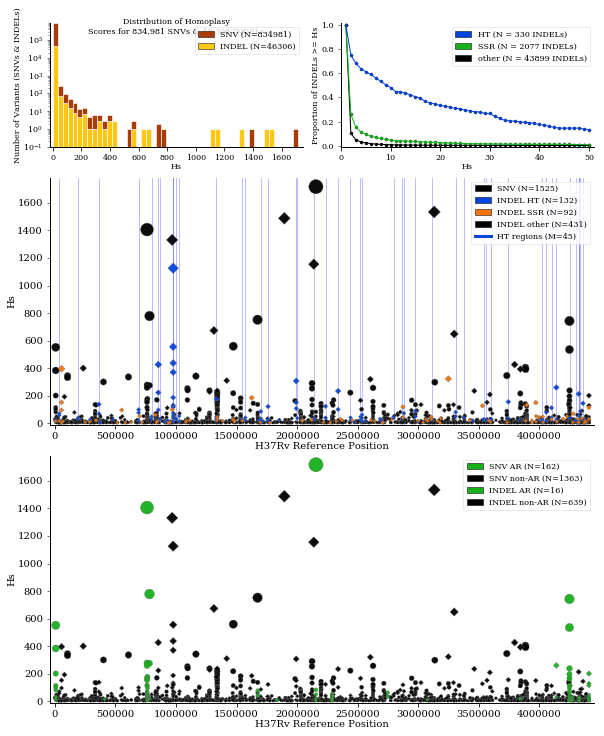

In [95]:
fig = plt.figure(constrained_layout=True)
spec = gridspec.GridSpec(ncols=2, nrows=3, figure=fig, height_ratios = [1,2,2])
spec.update(wspace=0.15, hspace=0.15) # set the spacing between axes. 

axA = fig.add_subplot(spec[0, 0])
axB = fig.add_subplot(spec[0, 1])
axC = fig.add_subplot(spec[1, :])
axD = fig.add_subplot(spec[2, :])

fig_SNV_and_INDEL_distribution_A(axA)
fig_prop_INDELs_Hs_for_HT_SSR_other_B(axB)
fig_manhattan_region_C(axC)
fig_manhattan_AR_D(axD)

fig = plt.gcf()
fig.set_size_inches(9.75, 12.5)
fig.tight_layout()

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/manhattan_plots_homoplasy_analyses.pdf'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = True)

file_name = '/n/data1/hms/dbmi/farhat/Roger/homoplasy_project/Figures/for publication/manhattan_plots_homoplasy_analyses.png'
plt.savefig(file_name, bbox_inches='tight', dpi = 300 , transparent = False)

plt.show()